In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd

In [ ]:

# Set up Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Define URL and fetch the page
url = "https://www.jumia.co.ke/flash-sales/"
driver.get(url)
time.sleep(5)  # Allow time for the page to load

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
products = soup.find_all('div', class_='info')

# Initialize a list to hold product data
product_list = []

# Loop through each product and extract details
for product in products:
    name = product.find('h3', class_='name').text if product.find('h3', class_='name') else 'No name'
    current_price = product.find('div', class_='prc').text if product.find('div', class_='prc') else 'No current price'
    old_price = product.find('div', class_='old').text if product.find('div', class_='old') else 'No old price'
    discount = product.find('div', class_='bdg _dsct _sm').text if product.find('div', class_='bdg _dsct _sm') else 'No discount'

    product_list.append({
        'Name': name,
        'Current Price': current_price,
        'Old Price': old_price,
        'Discount': discount
    })

    print(f"Product name: {name}\nCurrent Price: {current_price}\nOld Price: {old_price}\nDiscount: {discount}\n")

# Close the browser
driver.quit()


In [ ]:
df=pd.DataFrame(product_list)
df.head

In [16]:
df.to_csv('jumia_flash_sales.csv', index=False)

In [20]:
df.head()

,Name,Current Price,Old Price,Discount
0,Amtec AM-808 Sub Woofer Sound System -BT/USB/F...,"KSh 2,499","KSh 5,000",50%
1,"Vitron HTC3200S 32"" Inches Bluetooth-Enabled ...","KSh 12,790","KSh 24,000",47%
2,"Sonar Stainless Steel 1.8Ltr Electric Kettle,1...",KSh 483,KSh 749,36%
3,"Sonar 2L Cordless Electric Kettle ,1500W Energ...",KSh 599,KSh 800,25%
4,"XIAOMI Redmi Note 14, 6.67"", 256GB + 8GB RAM (...","KSh 24,462","KSh 30,000",18%


In [ ]:
pip install pandas matplotlib seaborn


Cleaning and Data Transformation
Convert price strings to numeric values (remove currency symbols) , getting rid of not found values


In [27]:
# Replace NaN with 0 for 'Current Price'
df['Current Price'] = df['Current Price'].apply(lambda x: 0 if pd.isna(x) else x)

# Replace NaN with 0 for 'Old Price'
df['Old Price'] = df['Old Price'].apply(lambda x: 0 if pd.isna(x) else x)


In [34]:
# Clean and convert 'Current Price'
df['Current Price'] = df['Current Price'].astype(str) \
                                         .str.replace("KSh", "", regex=False) \
                                         .str.replace(",", "", regex=False) \
                                         .str.strip()

# Clean and convert 'Old Price'
df['Old Price'] = df['Old Price'].astype(str) \
                                 .str.replace("KSh", "", regex=False) \
                                 .str.replace(",", "", regex=False) \
                                 .str.strip()

# Convert both to numeric, coercing errors
df['Current Price'] = pd.to_numeric(df['Current Price'], errors='coerce')
df['Old Price'] = pd.to_numeric(df['Old Price'], errors='coerce')


In [35]:
df.head()

,Name,Current Price,Old Price,Discount
0,Amtec AM-808 Sub Woofer Sound System -BT/USB/F...,2499.0,5000.0,50%
1,"Vitron HTC3200S 32"" Inches Bluetooth-Enabled ...",12790.0,24000.0,47%
2,"Sonar Stainless Steel 1.8Ltr Electric Kettle,1...",483.0,749.0,36%
3,"Sonar 2L Cordless Electric Kettle ,1500W Energ...",599.0,800.0,25%
4,"XIAOMI Redmi Note 14, 6.67"", 256GB + 8GB RAM (...",24462.0,30000.0,18%


In [ ]:
# Bar Chart of Products with Discounts
#Visualize price drops or discounts?

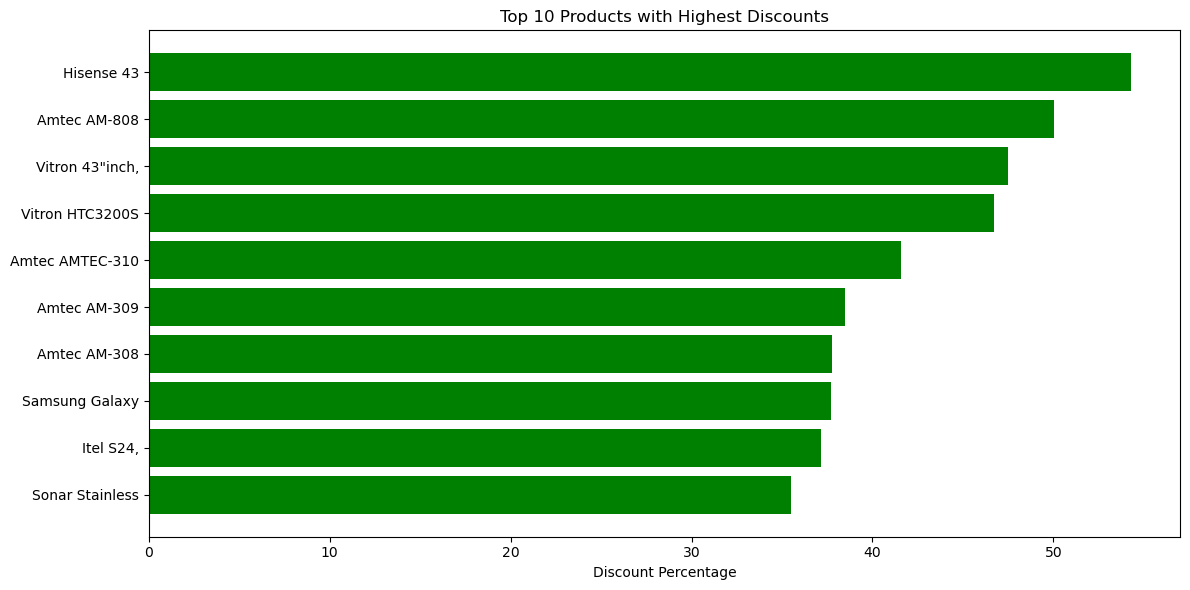

In [42]:
import matplotlib.pyplot as plt

# Add a new column for discount percentage
df['Discount %'] = ((df['Old Price'] - df['Current Price']) / df['Old Price']) * 100

# Sort by discount percentage and get top 10
df_sorted = df.sort_values(by='Discount %', ascending=False).head(10)

# Create short names (first two words)
df_sorted['Short Name'] = df_sorted['Name'].apply(lambda x: ' '.join(str(x).split()[:2]))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df_sorted['Short Name'], df_sorted['Discount %'], color='green')
plt.xlabel('Discount Percentage')
plt.title('Top 10 Products with Highest Discounts')
plt.gca().invert_yaxis()  # Highest discount on top
plt.tight_layout()
plt.show()


C:\Users\Hillary\AppData\Local\Temp\ipykernel_7740\3305810432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Short Name'] = df_top['Name'].apply(lambda x: ' '.join(str(x).split()[:2]))


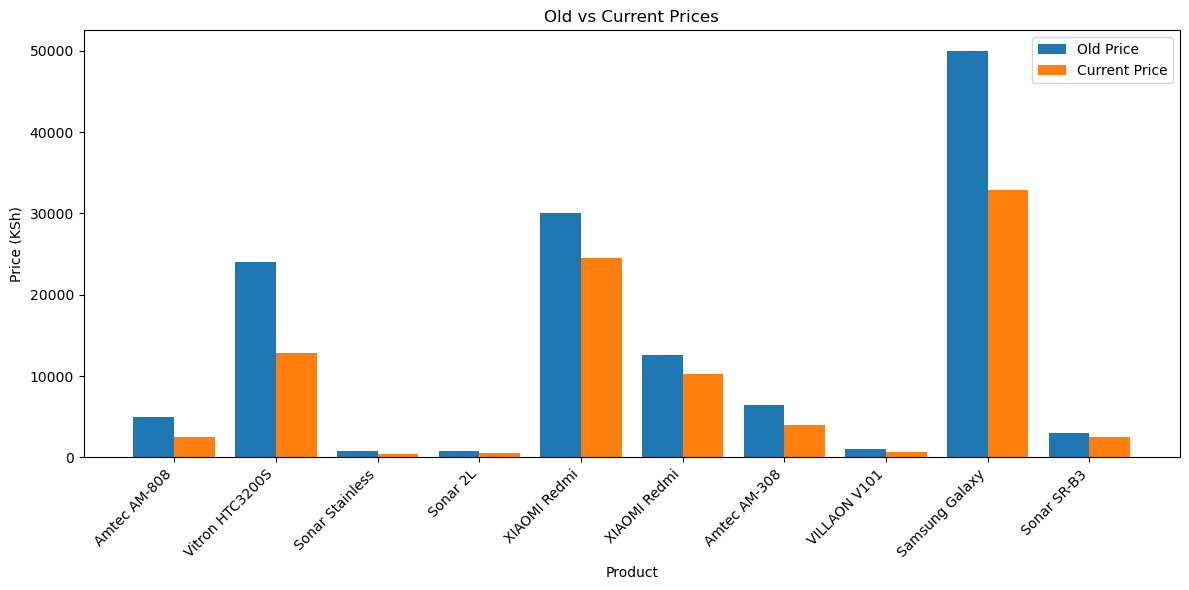

In [41]:
# Create a short name column with first two words of the product name
df_top['Short Name'] = df_top['Name'].apply(lambda x: ' '.join(str(x).split()[:2]))

# Plot with short names
plt.figure(figsize=(12, 6))
x = range(len(df_top))

plt.bar(x, df_top['Old Price'], width=0.4, label='Old Price', align='center')
plt.bar([p + 0.4 for p in x], df_top['Current Price'], width=0.4, label='Current Price', align='center')

plt.xticks([p + 0.2 for p in x], df_top['Short Name'], rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Price (KSh)')
plt.title('Old vs Current Prices')
plt.legend()
plt.tight_layout()
plt.show()


Representing discounts as a Histogram (Distribution)

C:\Users\Hillary\AppData\Local\Temp\ipykernel_7740\2124756455.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount %'].replace([np.inf, -np.inf], np.nan, inplace=True)


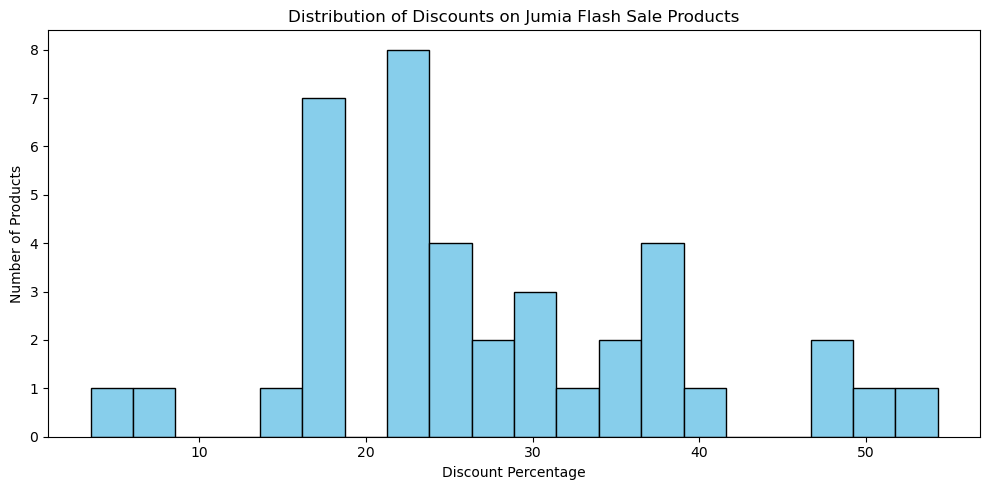

In [ ]:


# Ensure discount % is calculated
df['Discount %'] = ((df['Old Price'] - df['Current Price']) / df['Old Price']) * 100


df['Discount %'].replace([np.inf, -np.inf], np.nan, inplace=True)
discount_clean = df['Discount %'].dropna()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(discount_clean, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Products')
plt.title('Distribution of Discounts on Jumia Flash Sale Products')
plt.tight_layout()
plt.show()
